## CES-3904 Computational Earth Science
Prof. Daniel Westervelt - dmw2166@columbia.edu

Final Project
5 December 2024

Title: 

A Computational Model to Visualize the Effects of Added Influx of Fresh Melt-Water from the Greenland Ice Sheet on the North Atlantic Ocean Waters

Intro:

In this project, I will attempt to build a simple computational model, using the tools learned in this course, that aims to visualize a couple of climatic variables. Firstly, I will calculate the differential between the Greenland Sheet's newly forming ice versus the yearly mass loss due to melting. For this, I will use a loop styled function that will calculate the net ice loss over time. Secondly, I will use the results of the first model to inform a second model that takes into account the amount of surplus fresh waters added to the salty North Atlantic waters in order to visualize the potential changes to the ocean composition over time.

Sourcing Realistic Rates for Melting and Accumulation:

Melting Rate:   

            The Greenland Ice Sheet has been losing ice at an increasing rate in recent decades. According to NASA and other climate studies:
            In 2019, the Greenland Ice Sheet lost around 280 gigatons of ice per year on average (source: NASA).
            The melting rate is expected to increase over time due to rising global temperatures, which cause more melt during the summer months.

Accumulation Rate:

            The accumulation rate refers to how much snow and ice are added to the Greenland Ice Sheet annually. 
            This varies with seasonal precipitation, but the average rate has been around:
            150–200 gigatons per year in recent decades (source: NASA, IPCC reports).


#### Part I. Net Ice Mass Remaining and Net Ice Loss

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Initial constants:

initial_ice_mass = 2.9e6  # in gigatons
melting_rate = 280        # in gigatons per year
accumulation_rate = 150   # in gigatons per year

# Time parameters:

years = 500

# First arrays to store results:

ice_mass = np.zeros(years)        # arraying ice mass over time (in gigatons)
runoff_volume = np.zeros(years)   # arraying the volume of freshwater runoff (in gigatons)

# Initial conditions for starting ice mass:

ice_mass[0] = initial_ice_mass

# Arrays to store percentage changes for plotting:

accumulation_rate_percent = np.zeros(years)        # Accumulation rate in percentage
melting_rate_percent = np.zeros(years)             # Melting rate in percentage
cumulative_runoff_volume = np.zeros(years)         # Cumulative net ice loss

# Simulating a loop function where ice mass change = melting - accumulation:

for year in range(1, years):
    melting_rate = 280 * (1 + (year * 0.02))            # Melting rate increases by 2% each year
    accumulation_rate *= 0.96                           # Accumulation rate decreases by 4% each year
    net_ice_loss = melting_rate - accumulation_rate     # Calculate the net ice loss (melting minus accumulation)
    ice_mass[year] = ice_mass[year - 1] - net_ice_loss  # Update ice mass at the end of each year
    runoff_volume[year] = net_ice_loss                  # Runoff volume in gigatons is equal to the net ice loss
    
    cumulative_runoff_volume[year] = cumulative_runoff_volume[year - 1] + runoff_volume[year]     # Cumulatively sum the net ice loss to get the total net loss over time


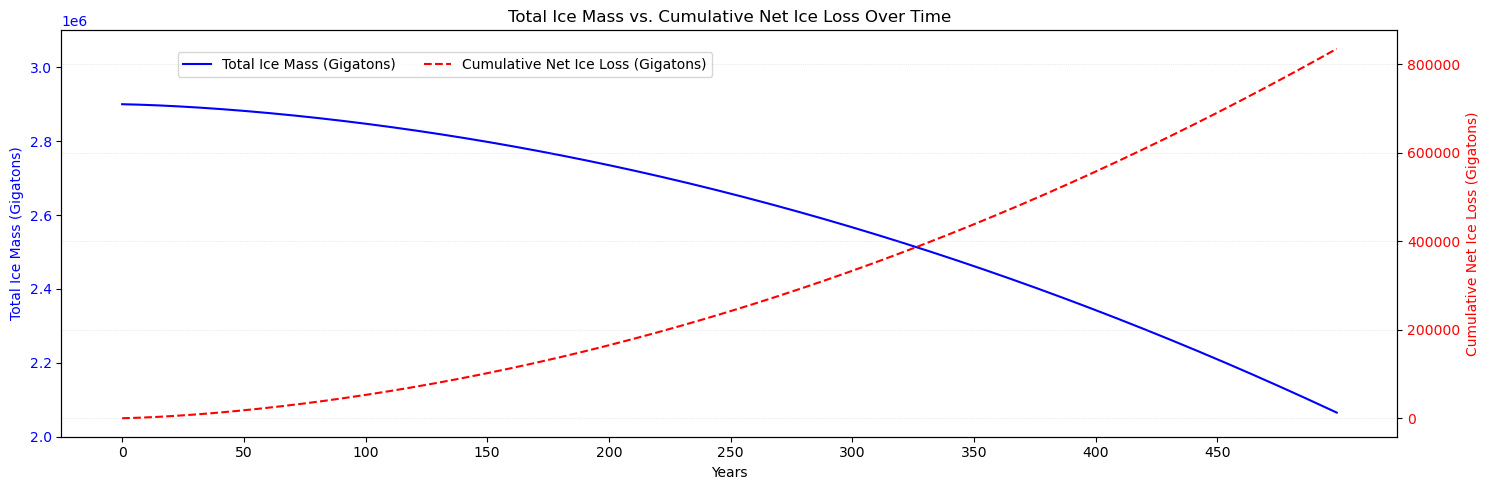

In [103]:
# Plotting:

fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.plot(range(years), ice_mass, label="Total Ice Mass (Gigatons)", color="b")
ax1.set_ylabel("Total Ice Mass (Gigatons)", color="b")
ax1.set_xlabel("Years")
ax1.tick_params(axis='y', labelcolor="b")
ax1.set_xticks(np.arange(0, years, 50))

ax1.set_ylim(2e6, 3.1e6)  # -> played around with the y-axis ticks because originally it only went from 2.2 to 2.8 Gt

ax2 = ax1.twinx()
ax2.plot(range(years), cumulative_runoff_volume, label="Cumulative Net Ice Loss (Gigatons)", color="r", linestyle="--")
ax2.set_ylabel("Cumulative Net Ice Loss (Gigatons)", color="r")
ax2.tick_params(axis='y', labelcolor="r")

fig.legend(loc='upper center', bbox_to_anchor=(0.3, 0.9), ncol=2, fontsize=10)

plt.title("Total Ice Mass vs. Cumulative Net Ice Loss Over Time")
plt.grid(True, linestyle=':', linewidth=0.5, alpha=.5)
plt.tight_layout()
plt.show()


#### Part II. Adding Albedo 

In [104]:
# Intial Constants Now With Alebdo Values:

initial_ice_mass = 2.9e6      # in gigatons
melting_rate = 280            # in gigatons per year
accumulation_rate = 150       # in gigatons per year

years = 500                   # Simulation for 500 years

initial_albedo = 0.8          # Initial albedo of the Greenland Ice Sheet

# First arrays to store results:

ice_mass = np.zeros(years)        # array for ice mass over time
runoff_volume = np.zeros(years)   # array for the volume of runoff (in gigatons)
albedo_values = np.zeros(years)   # array for albedo values over time

# Initial conditions for starting ice mass and albedo:

ice_mass[0] = initial_ice_mass
albedo_values[0] = initial_albedo

# Assuming an Albedo decrease by 5% for each gigaton of ice lost:

delta_albedo = 0.05   # -> Considering the loss of high albedo area due to melting ice
                      # -> AND that the area is now a dark volcanic soil 
                      # -> AND that surrounding ice turns gray-ish instead of pure ice white

# Arrays to store percentage changes for plotting
accumulation_rate_percent = np.zeros(years)        # Accumulation rate in percentage
melting_rate_percent = np.zeros(years)             # Melting rate in percentage
cumulative_runoff_volume = np.zeros(years)         # Cumulative net ice loss


# Calculating loop for ice mass, runoff, and albedo changes:

for year in range(1, years):
    melting_rate = 280 * (1 + (year * 0.02))     # Melting rate increases by 2% each year  
    accumulation_rate *= 0.96                    # Accumulation rate decreases by 4% each year
    net_ice_loss = melting_rate - accumulation_rate
    
    ice_mass[year] = ice_mass[year - 1] - net_ice_loss
    
    runoff_volume[year] = net_ice_loss
    
    cumulative_runoff_volume[year] = cumulative_runoff_volume[year - 1] + runoff_volume[year]

    albedo_values[year] = initial_albedo - (1 - (ice_mass[year] / initial_ice_mass)) * delta_albedo


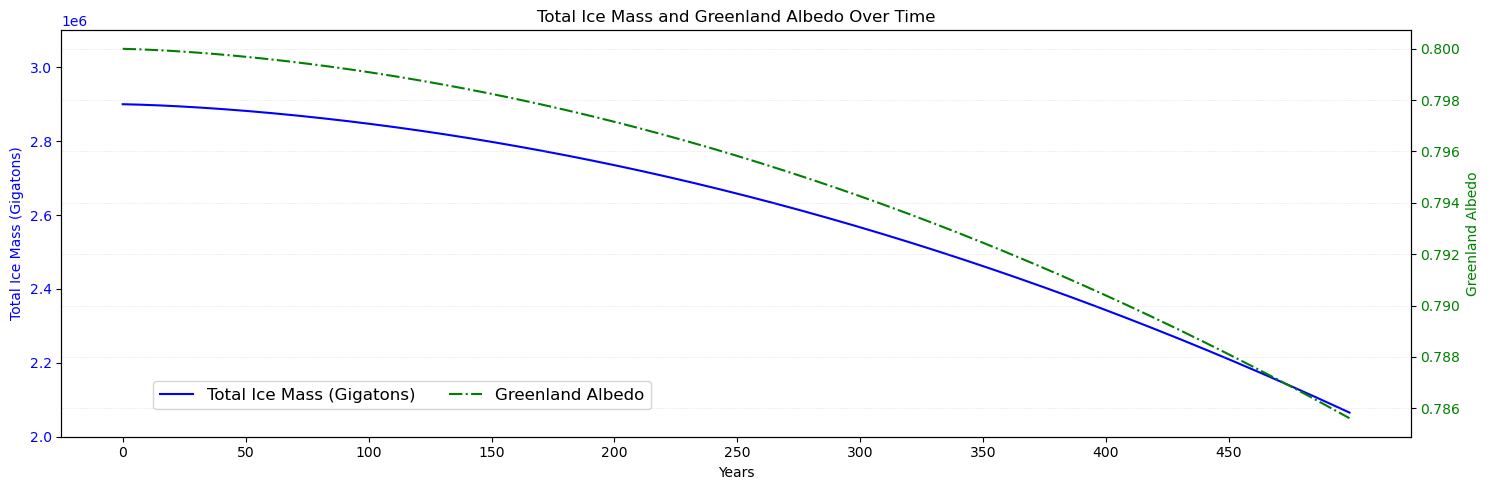

In [105]:
# Plotting:

fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the total ice mass over time (left axis)
ax1.plot(range(years), ice_mass, label="Total Ice Mass (Gigatons)", color="b")
ax1.set_ylabel("Total Ice Mass (Gigatons)", color="b")
ax1.set_xlabel("Years")
ax1.tick_params(axis='y', labelcolor="b")
ax1.set_ylim(2e6, 3.1e6)  
ax1.set_xticks(np.arange(0, years, 50))

ax2 = ax1.twinx()
ax2.plot(range(years), albedo_values, label="Greenland Albedo", color='g', linestyle='-.')
ax2.set_ylabel("Greenland Albedo", color='g')
ax2.tick_params(axis='y', labelcolor='g')

fig.legend(loc='center left', bbox_to_anchor=(0.1, 0.2), ncol=3, fontsize=12)

plt.title("Total Ice Mass and Greenland Albedo Over Time")
plt.grid(True, linestyle=':', linewidth=0.5, alpha=.5)
plt.tight_layout()
plt.show()

#### Part III. Including New Albedo Changes Into Global Albedo

##### Using the same fucntions from class to calculate a change in the total Earth albedo values based purely on a change to Greenland's albedo
##### Key assumption here is that the Greenland Ice Sheet contributes to about 15% of Earth's total albedo value 
##### Originally I had tried to calculate the change to global temperature adjusting our functions from class for planetary solar insulation but I kept messing up the function when I tried to add my new albedo values and would either get a freezing planet or a burning planet so I cut that from my project

In [106]:
# Constants:

albedo_earth = 0.3              # Average albedo of Earth (excluding Greenland)
initial_albedo_greenland = 0.8  # Initial albedo of Greenland Ice Sheet
delta_albedo_greenland = 0.06   # Change in albedo for every gigaton of ice lost

initial_ice_mass = 2.9e6        # in gigatons
melting_rate = 280              # in gigatons per year
accumulation_rate = 150         # in gigatons per year

# Time parameters:

years = 500

# Arrays for storing results:

ice_mass = np.zeros(years)
runoff_volume = np.zeros(years)
albedo_values = np.zeros(years)
global_albedo = np.zeros(years)

# Initial conditions:

ice_mass[0] = initial_ice_mass
albedo_values[0] = initial_albedo_greenland

# Calculating ice mass and albedo changes over time:

for year in range(1, years):
    melting_rate = 280 * (1 + (year * 0.02))               # Melting rate increases by 2% each year
    accumulation_rate *= 0.96                              # Accumulation rate decreases by 4% each year
    net_ice_loss = melting_rate - accumulation_rate
    ice_mass[year] = ice_mass[year - 1] - net_ice_loss
    runoff_volume[year] = net_ice_loss
    albedo_values[year] = initial_albedo_greenland - (1 - (ice_mass[year] / initial_ice_mass)) * delta_albedo_greenland

# Function to update global albedo:

def global_albedo_change(year):
    greenland_albedo_change = albedo_values[year] - initial_albedo_greenland
    global_albedo = albedo_earth - 0.15 * greenland_albedo_change  # Greenland contributes 15% to the global albedo

    return global_albedo

# Storing the global albedo values for each year:

for year in range(years):
    global_albedo[year] = global_albedo_change(year)


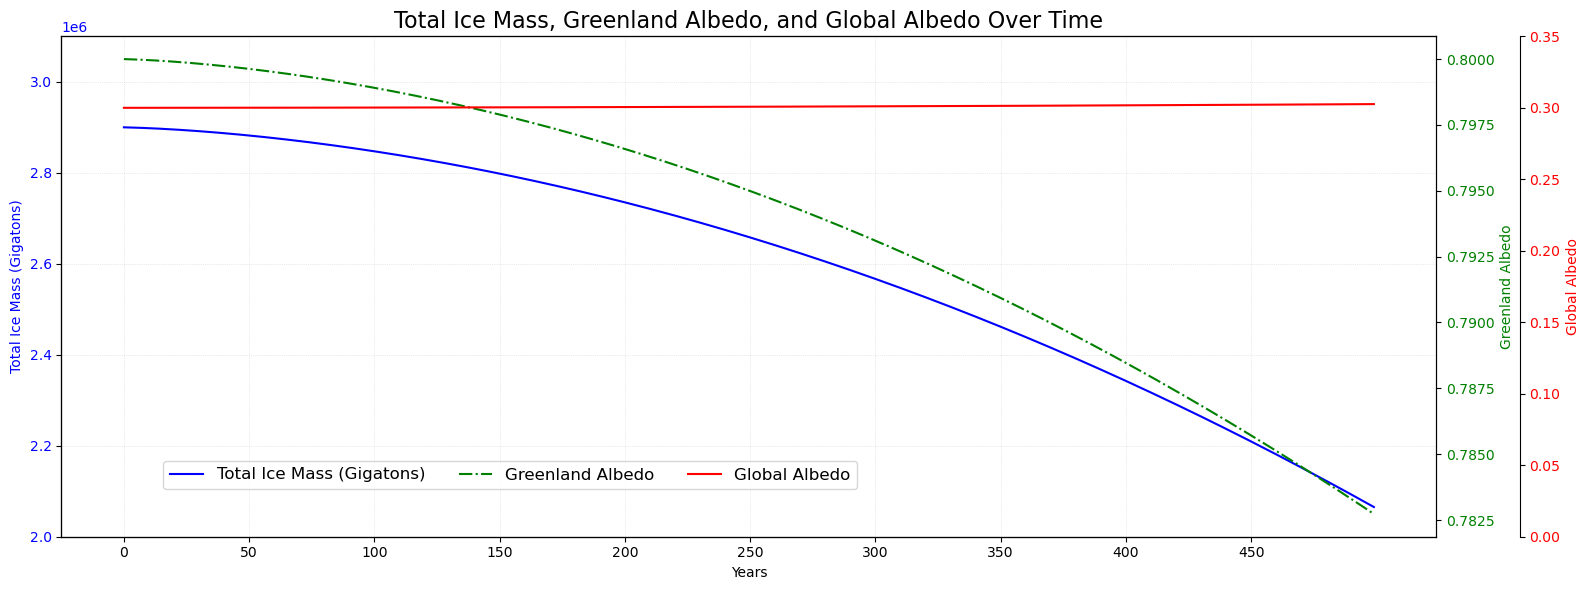

In [107]:
# Plotting the results

fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.plot(range(years), ice_mass, label="Total Ice Mass (Gigatons)", color="b")
ax1.set_ylabel("Total Ice Mass (Gigatons)", color="b")
ax1.set_xlabel("Years")
ax1.tick_params(axis='y', labelcolor="b")
ax1.set_ylim(2e6, 3.1e6)  # Adjust the y-axis range to focus on the relevant range
ax1.set_xticks(np.arange(0, years, 50))

ax2 = ax1.twinx()
ax2.plot(range(years), albedo_values, label="Greenland Albedo", color='g', linestyle='-.')
ax2.set_ylabel("Greenland Albedo", color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

# Plot the global albedo change on the third y-axis
ax3.plot(range(years), global_albedo, label="Global Albedo", color="r")
ax3.set_ylabel("Global Albedo", color="r")
ax3.tick_params(axis='y', labelcolor="r")
ax3.set_ylim(0, 0.35)  

fig.legend(loc='center left', bbox_to_anchor=(0.1, 0.2), ncol=3, fontsize=12)

plt.title("Total Ice Mass, Greenland Albedo, and Global Albedo Over Time", fontsize=16)
ax1.grid(True, linestyle=':', linewidth=0.5, alpha=.5)
plt.tight_layout()
plt.show()


#### After this I wanted to know what effect the net ice loss would have on the ocean waters around Greenland. For this portion, I avoided trying to calculate any kind of ocean currents model as that would be too advanced for me. My model will assume that the ocean waters around Greenland are static or at least that they retain their initial conditions over 500 years. This is unrealistic but I hope the model will still provide a useful visualization of the changes on the ocean waters characteristics.

#### More than anything, I am curious about the changes to the surrounding water's salinity and temperature values since these two values dicate the water mass' density. I will first try to write some function that calculates the input of salinity and temperature into density. Secondly, I will try to use that function to model out how the density would change over time.

In [110]:
# First, trying to calculate density based on salinity and temperature:

# Constants and/or initial conditions:

initial_salinity = 35      # PSU (Practical Salinity Units)
initial_temperature = 5    # Degrees Celsius
years = 500                # Number of years

# Initial arrays for ice mass and runoff volume:

ice_mass = np.zeros(years) 
runoff_volume = np.zeros(years)  

# Defining the calculate_density function:

def calculate_density(salinity, temperature):
    
    # Constants neededfor density calculation:
    
    rho_0 = 1000  # Reference density in kg/m^3
    alpha = 0.8   # Density change per PSU in kg/m^3
    beta = 0.2    # Density change per degree Celsius in kg/m^3
    
    density = rho_0 + alpha * salinity + beta * temperature
    return density

# Defining the density model/function:

def density_model(ice_mass, runoff_volume, years, initial_salinity, initial_temperature):
    # Initial arrays inside the function:
    
    salinity = initial_salinity
    temperature = initial_temperature
    density_changes = np.zeros(years)
    salinity_changes = np.zeros(years)
    temperature_changes = np.zeros(years)

    # Loop over the years to model out the changes:
    
    for year in range(1, years):
        freshwater_runoff = runoff_volume[year]                          # in gigatons
        salinity_change = -0.05 * freshwater_runoff                      # decrease in salinity with runoff by about 5% 
        temperature_change = -0.05 * freshwater_runoff                   # decrease in temperature with runoff by about 5%
        
        salinity += salinity_change                                      # updating salinity and temperature based on the runoff
        temperature += temperature_change
        
        density_changes[year] = calculate_density(salinity, temperature) # storing the new density and temperature values in the arrays
        salinity_changes[year] = salinity
        temperature_changes[year] = temperature
    
    return density_changes, salinity_changes, temperature_changes

density_changes, salinity_changes, temperature_changes = density_model(ice_mass, runoff_volume, years, initial_salinity, initial_temperature)                                                   # to call the density model function
initial_salinity_grid, initial_temperature_grid = np.meshgrid(np.linspace(30, 40, 100), np.linspace(0, 10, 100))                                                                                # creating a grid for the initial salinity and temperature
initial_density_grid = calculate_density(initial_salinity_grid, initial_temperature_grid)                                                                                                       # calculating an initial density values for the grid using the formula
final_salinity_grid, final_temperature_grid = np.meshgrid(np.linspace(min(salinity_changes), max(salinity_changes), 100), np.linspace(min(temperature_changes), max(temperature_changes), 100)) # creating a grid for the final salinity and temperature (after 500 years)
final_density_grid = calculate_density(final_salinity_grid, final_temperature_grid)                                                                                                             # calculating final density values for the grid using the formula



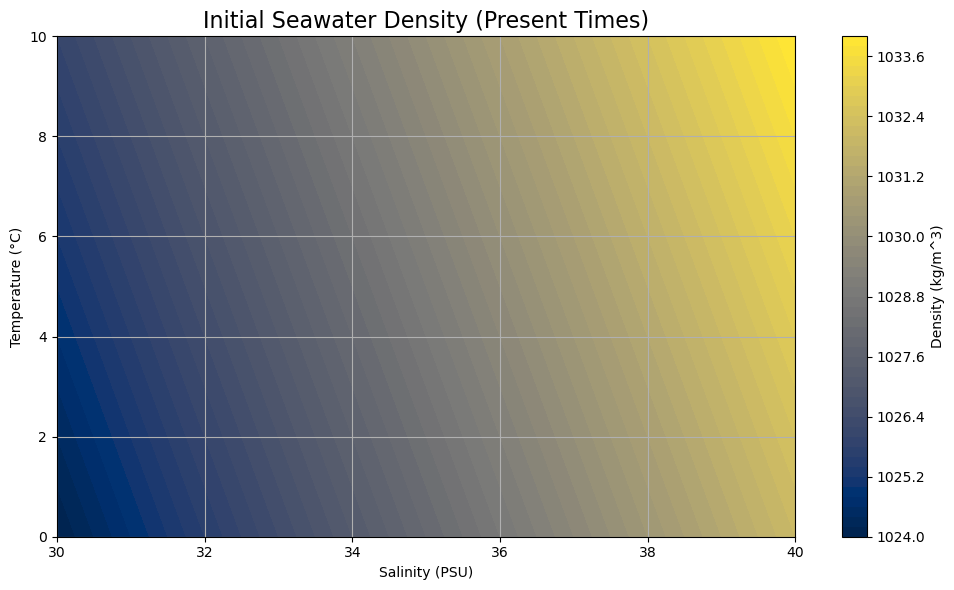

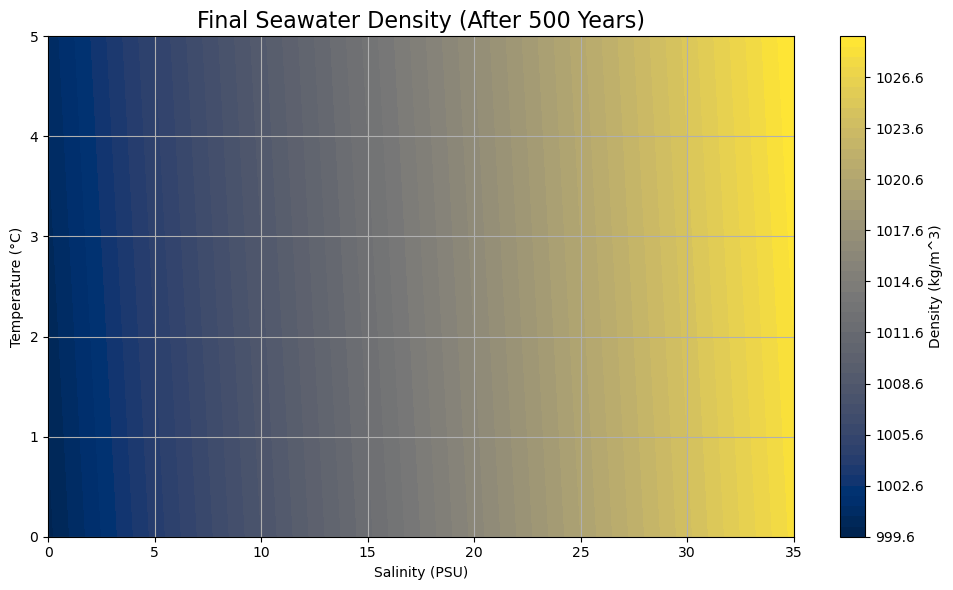

In [109]:
# Plotting the initial density values:

plt.figure(figsize=(10, 6))
cp = plt.contourf(initial_salinity_grid, initial_temperature_grid, initial_density_grid, levels=50, cmap='cividis')
plt.colorbar(cp, label="Density (kg/m^3)")
plt.title("Initial Seawater Density (Present Times)", fontsize=16)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()

plt.show()

# Plotting the final density values:

plt.figure(figsize=(10, 6))
cp = plt.contourf(final_salinity_grid, final_temperature_grid, final_density_grid, levels=50, cmap='cividis')
plt.colorbar(cp, label="Density (kg/m^3)")
plt.title("Final Seawater Density (After 500 Years)", fontsize=16)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()

plt.show()

#### This simple model does show that the North Atlantic waters will likely experience a significant change in its water density range as fresher meltwater runoff from the Greenland Ice Sheet is deposited in the ocean over time. This has important implications for the formation of deep water in the North Atlantic ocean which feeds the overall circulation and recycling of ocean waters around the world, namely through the Atlantic Meridional Overturning Circulation (AMOC)

#####  In this code, I tried to make it easier to adjust the initial constant values to adjust the model. For example, it may turn out that the influx of fresh meltwater has a larger or lower effect on ocean salinity. I tried to use conservative values based on a couple of academic papers on the topic but I am no expert on the matter. 